In [1]:
!python -m pip install pyyaml==5.1
import sys, os, distutils.core

DEPRECATION: Loading egg at /opt/anaconda3/envs/gee/lib/python3.12/site-packages/mask_rcnn_tf2-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
  Using cached PyYAML-5.1.tar.gz (274 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [37 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "/private/var/folders/rd/_c2cyfss0tz0pv4ywsns9nqc0000gn/T/pip-install-6a7cf72v/pyyaml_e54684a3647b4e78b958631a9ed846fa/setup.py", line 291, in <module>
          setup(
        File "/opt/anaconda3/envs/gee/lib/python3.12/site-packages/setuptools/_distutils/core.py", line 186, in setup
          return run_command

In [2]:
!git clone 'https://github.com/facebookresearch/detectron2'

fatal: destination path 'detectron2' already exists and is not an empty directory.


In [3]:
dist = distutils.core.run_setup("./detectron2/setup.py")
!python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
sys.path.insert(0, os.path.abspath('./detectron2'))

DEPRECATION: Loading egg at /opt/anaconda3/envs/gee/lib/python3.12/site-packages/mask_rcnn_tf2-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
Ignoring dataclasses: markers 'python_version < "3.7"' don't match your environment

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [4]:
# Import pytorch and detectron2
import torch, detectron2

In [5]:
# Version verification
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

zsh:1: command not found: nvcc
torch:  2.5 ; cuda:  2.5.1
detectron2: 0.6


In [6]:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

<Logger detectron2 (DEBUG)>

In [7]:
# import necessary libraries
import numpy as np
import os, json, cv2, random

In [8]:
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

matplotlib data path: /opt/anaconda3/envs/gee/lib/python3.12/site-packages/matplotlib/mpl-data
CONFIGDIR=/Users/sandaludesilva/.matplotlib
interactive is False
platform is darwin
CACHEDIR=/Users/sandaludesilva/.matplotlib
Using fontManager instance from /Users/sandaludesilva/.matplotlib/fontlist-v390.json


In [9]:
import base64
import IPython
import json
import numpy as np
import os
import random
import requests
from io import BytesIO
from math import trunc
from PIL import Image as PILImage
from PIL import ImageDraw as PILImageDraw

# Load the model

In [20]:
from detectron2.engine import DefaultTrainer

cfg1 = get_cfg()
cfg1.OUTPUT_DIR = "./output"
cfg1.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")) #ResNet-101 for better feature extraction
cfg1.MODEL.ROI_HEADS.NUM_CLASSES = 4  # um_classes+1 here.
cfg1.MODEL.WEIGHTS = os.path.join(cfg1.OUTPUT_DIR, "model_final.pth")  # path to the model we just trained
cfg1.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5   # set a custom testing threshold
cfg1.MODEL.DEVICE = "cpu" 

In [21]:
predictor1 = DefaultPredictor(cfg1)

[02/17 13:42:40 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...
[Checkpointer] Loading from ./output/model_final.pth ...


/opt/anaconda3/envs/gee/lib/python3.12/site-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.d

In [22]:
# Define the metadata manually
metadata = MetadataCatalog.get("dataset_train").set(
    thing_classes=["Building", "Shadow", "Tree", "Tree shadow"]  # Add your class names here
)

In [23]:
from detectron2.utils.visualizer import ColorMode

im = cv2.imread("./00190.png")



In [24]:
outputs = predictor1(im)


In [25]:
import matplotlib.pyplot as plt

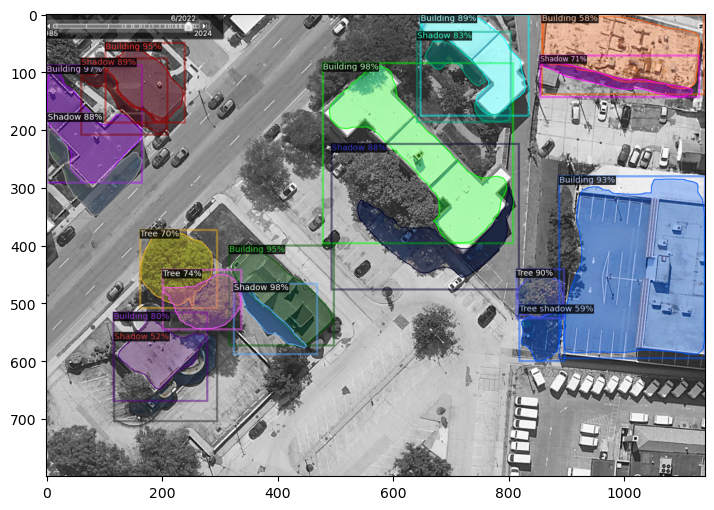

In [26]:
# Visualize the results
v = Visualizer(
    im[:, :, ::-1],  
    metadata=metadata,
    scale=0.5,
    instance_mode=ColorMode.IMAGE_BW  
)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))

plt.figure(figsize=(10, 6)) 
plt.imshow(out.get_image())  
plt.show() 